<!-- <p align="center">
    <b>Redwine Prediction</b>
  <br>
  <img src="img/redwine_3.jpg" />
</p> -->

## Redwine Prediction
<img src="img/redwine_3.jpg" width="500" height="500" />
<!-- ![caption](files/image.png) -->
<!-- <img src="img/redwine_3.jpg" width="300" height="300" style="width:300px;height:200px;" /> -->
<!-- ![redwine_image](../../images/redwine.jpg) -->
<!-- <img align="right"  src="../../images/redwine.jpg" /> -->
<!-- <img align="center"  src="../../images/redwine_3.jpg" style="width:500px;height:300px;margin-left:130px;" /> -->


<img src="img/redwine.jpg" width="400" height="400" />

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load dataset from local storage

In [2]:
df = pd.read_csv('winequality-red.csv')

### Observe dataset

In [3]:
# df.shape
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Visualization

#### Check for missing values

<AxesSubplot:>

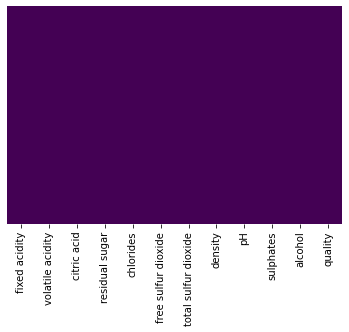

In [4]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

##### The above tells us there are no missing values

#### We need view quality distribution

We will use catplot to display out record

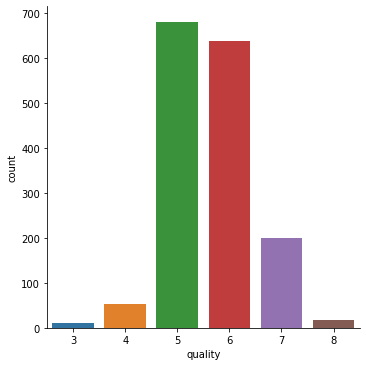

In [5]:
# sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# good_wine = df.query('quality > 6.5')
# plt.hist(x='quality', data=df)
# fig.show()
sns.catplot(x='quality',  kind='count', data=df)

#### The above gives us a pictorial view for the distribution of wine quality
##### The instruction given is that good wine has quality greater than 6.5

##### The below, queries the dataset to view wines with quality greater than 6.5

In [6]:
df.query('quality > 6.5')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7


From the above we see that wine quality greater than 6.5 is 217

#### To determine other properties that make redwine good, we use the heatmap to determine the correlation

<AxesSubplot:>

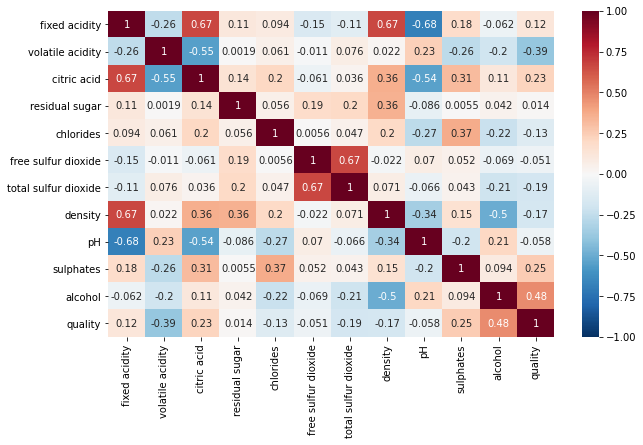

In [7]:
corr = df.corr()
plt.subplots(figsize=(10,6))
sns.heatmap(corr, annot=True,linewidths=0, vmin=-1, cmap="RdBu_r")
# sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

### Further analysis between quality and other properties

#### Quality and Volatile Acidity

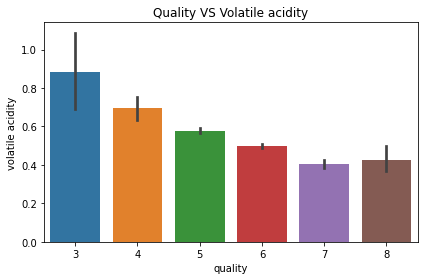

<Figure size 432x288 with 0 Axes>

In [8]:
sns.barplot(x='quality', y='volatile acidity', data=df[['quality', 'volatile acidity']])
plt.title('Quality VS Volatile acidity')

plt.tight_layout()
plt.show()
plt.gcf().clear()

The above shows that valatile acidity is negatively affect good wine

#### Quality and Alcohol

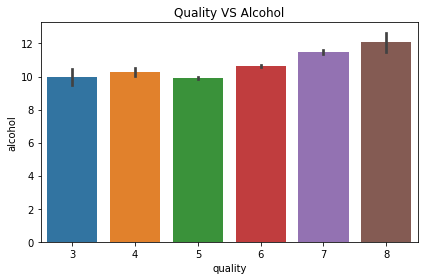

<Figure size 432x288 with 0 Axes>

In [9]:
sns.barplot(x='quality', y='alcohol', data=df[['quality', 'alcohol']])
plt.title('Quality VS Alcohol')

plt.tight_layout()
plt.show()
plt.gcf().clear()

##### As show above and also from the heatmap, alcohol has a positive correlation to good wine.

#### Quality and Residual Sugar

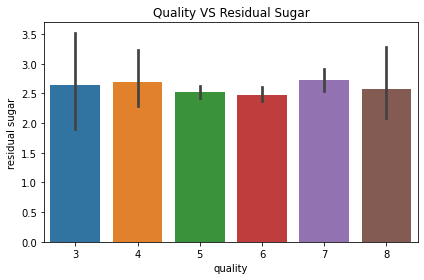

<Figure size 432x288 with 0 Axes>

In [10]:
sns.barplot(x='quality', y='residual sugar', data=df[['quality', 'residual sugar']])
plt.title('Quality VS Residual Sugar')

plt.tight_layout()
plt.show()
plt.gcf().clear()

##### From the map above, we can also see that residual sugar also affects the quality of the wine